In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [3]:
country_net = nx.read_graphml("../networks/graphml/countrys_network.graphml")
city_net = nx.read_graphml("../networks/graphml/cities_network.graphml")
combined_net = nx.read_graphml("../networks/graphml/combined_network.graphml")

In [ ]:
def plot_network_graphviz(G, title, filename=None, layout='sfdp'):

    for u, v in G.edges():
        G[u][v]['weight'] = get_jaccard_weight(G, u, v)

    A = to_agraph(G)

    A.graph_attr.update(
        layout=layout,
        overlap="scale",
        splines="true",
        repulsiveforce="2.5",
        outputorder="edgesfirst",
        size="12,8!",
        ratio="fixed",
        margin="0.1",
        dpi="2500",
        bgcolor="white"
    )

    centrality = nx.degree_centrality(G)

    for n in A.nodes():
        c = centrality[n]
        A.get_node(n).attr.update(
            shape="circle",
            width=str(5. + 25 * c),
            height=str(5. + 25 * c),
            fixedsize="true",
            style="filled",
            fillcolor="#4AB4FFAA",
            label=n,
            fontsize="24",
            fontname="Helvetica-Bold",
            fontcolor="black",
        )

    for e in A.edges():
        A.get_edge(e[0], e[1]).attr.update(
            color="#E7548011",
            penwidth="20"
        )

    A.layout(prog=layout)
    A.draw(f"{filename}")

In [22]:
def get_jaccard_weight(G, u, v):
    # Get neighbors regardless of direction
    set_u = set(nx.all_neighbors(G, u))
    set_v = set(nx.all_neighbors(G, v))
    union_len = len(set_u.union(set_v))
    if union_len == 0: return -1
    return -(len(set_u.intersection(set_v)) / union_len) - 1

def plot_network(G, title):

    # # For every edge (u, v), set weight based on shared neighbors
    for u, v in G.edges():
        G[u][v]['weight'] = get_jaccard_weight(G, u, v)

    fig, ax = plt.subplots(figsize=(16, 10))

    pos = nx.spring_layout(G, method='energy', weight='weight', k=5.5, iterations=100)

    degrees = np.array([G.degree(n) for n in G.nodes()])
    norm = Normalize(degrees.min(), degrees.max())
    cmap = plt.get_cmap('coolwarm')  # blue to red

    node_colors = cmap(norm(degrees))

    node_size=np.array(list(nx.degree_centrality(G).values()))*3000 + 100

    edge_alpha = np.array(list(nx.edge_betweenness_centrality(G).values())) + 0.2

    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_colors, edgecolors='black', alpha=0.7, ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color='tab:grey', alpha=edge_alpha, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=10, ax=ax)

    ax.set_title(title, fontsize=16)
    ax.axis('off')
    plt.tight_layout()

    return fig, ax

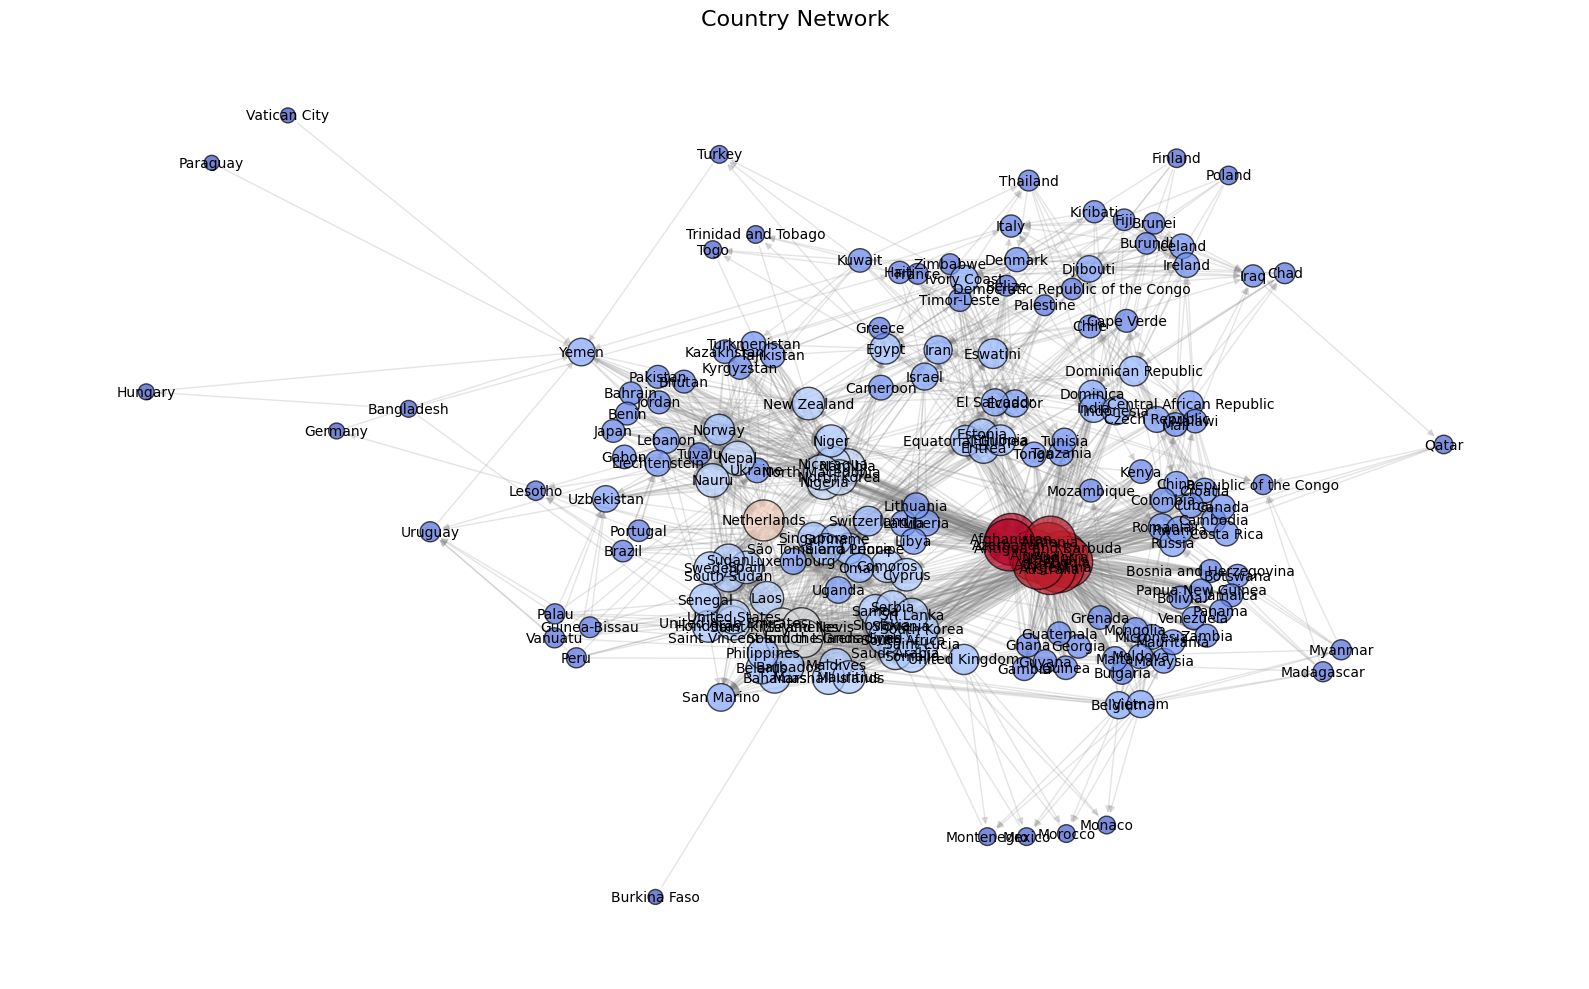

In [24]:
fig, ax = plot_network(country_net, "Country Network")
plt.show(fig)

OSError: Warning: node 'Al Mawşil al Jadīdah', graph '' size too small for label
Warning: node 'Al Başrah al Qadīmah', graph '' size too small for label
Warning: node 'Antananarivo', graph '' size too small for label
Warning: node 'Dongguan', graph '' size too small for label
Warning: node 'Dar es Salaam', graph '' size too small for label
Warning: node 'Diyarbakır', graph '' size too small for label
Warning: node 'Dombivali', graph '' size too small for label
Warning: node 'Nizhniy Novgorod', graph '' size too small for label
Warning: node 'Navi Mumbai', graph '' size too small for label
Warning: node 'New York City', graph '' size too small for label
Warning: node 'New Taipei City', graph '' size too small for label
Warning: node 'New Territories', graph '' size too small for label
Warning: node 'Nowrangapur', graph '' size too small for label
Warning: node 'Santa Cruz de la Sierra', graph '' size too small for label
Warning: node 'Singapore', graph '' size too small for label
Warning: node 'Shenyang', graph '' size too small for label
Warning: node 'Saint Petersburg', graph '' size too small for label
Warning: node 'Shijiazhuang', graph '' size too small for label
Warning: node 'Semarang', graph '' size too small for label
Warning: node 'South Tangerang', graph '' size too small for label
Warning: node 'Shubrā al Khaymah', graph '' size too small for label
Warning: node 'Shanghai', graph '' size too small for label
Warning: node 'Shenzhen', graph '' size too small for label
Warning: node 'São Paulo', graph '' size too small for label
Warning: node 'Santiago', graph '' size too small for label
Warning: node 'Santo Domingo', graph '' size too small for label
Warning: node 'Santiago de Querétaro', graph '' size too small for label
Warning: node 'San Antonio', graph '' size too small for label
Warning: node 'San Diego', graph '' size too small for label
Warning: node 'Shangrao', graph '' size too small for label
Warning: node 'Shantou', graph '' size too small for label
Warning: node 'Shangqiu', graph '' size too small for label
Warning: node 'Santiago de los Caballeros', graph '' size too small for label
Warning: node 'Shymkent', graph '' size too small for label
Warning: node 'Omdurman', graph '' size too small for label
Warning: node 'Ouagadougou', graph '' size too small for label
Warning: node 'Hiroshima', graph '' size too small for label
Warning: node 'Hyderabad', graph '' size too small for label
Warning: node 'Hong Kong Island', graph '' size too small for label
Warning: node 'Hong Kong', graph '' size too small for label
Warning: node 'Haiphong', graph '' size too small for label
Warning: node 'Hengyang', graph '' size too small for label
Warning: node 'Ho Chi Minh City', graph '' size too small for label
Warning: node 'Hangzhou', graph '' size too small for label
Warning: node 'Huizhou', graph '' size too small for label
Warning: node 'Yokohama', graph '' size too small for label
Warning: node 'Yancheng', graph '' size too small for label
Warning: node 'Yekaterinburg', graph '' size too small for label
Warning: node 'Yangjiang', graph '' size too small for label
Warning: node 'Yangzhou', graph '' size too small for label
Warning: node 'Yaoundé', graph '' size too small for label
Warning: node 'Ecatepec de Morelos', graph '' size too small for label
Warning: node 'Rawalpindi', graph '' size too small for label
Warning: node 'Rasapūdipalem', graph '' size too small for label
Warning: node 'Rio de Janeiro', graph '' size too small for label
Warning: node 'Ra’s Bayrūt', graph '' size too small for label
Warning: node 'Rostov-na-Donu', graph '' size too small for label
Warning: node 'Gustavo Adolfo Madero', graph '' size too small for label
Warning: node 'Melbourne', graph '' size too small for label
Warning: node 'Mianyang', graph '' size too small for label
Warning: node 'Maoming', graph '' size too small for label
Warning: node 'Mbuji-Mayi', graph '' size too small for label
Warning: node 'Maiduguri', graph '' size too small for label
Warning: node 'Mexico City', graph '' size too small for label
Warning: node 'Moscow', graph '' size too small for label
Warning: node 'Mogadishu', graph '' size too small for label
Warning: node 'Maracaibo', graph '' size too small for label
Warning: node 'Manhattan', graph '' size too small for label
Warning: node 'Makassar', graph '' size too small for label
Warning: node 'Montevideo', graph '' size too small for label
Warning: node 'Mandalay', graph '' size too small for label
Warning: node 'Monterrey', graph '' size too small for label
Warning: node 'Malingao', graph '' size too small for label
Warning: node 'Kakamega', graph '' size too small for label
Warning: node 'Kunming', graph '' size too small for label
Warning: node 'Kaohsiung', graph '' size too small for label
Warning: node 'Kallakurichi', graph '' size too small for label
Warning: node 'Kawasaki', graph '' size too small for label
Warning: node 'Kisangani', graph '' size too small for label
Warning: node 'Kuala Lumpur', graph '' size too small for label
Warning: node 'Kathmandu', graph '' size too small for label
Warning: node 'Krasnoyarsk', graph '' size too small for label
Warning: node 'Tangerang', graph '' size too small for label
Warning: node 'Tirunelveli', graph '' size too small for label
Warning: node 'Tianshui', graph '' size too small for label
Warning: node 'Tangshan', graph '' size too small for label
Warning: node 'The Bronx', graph '' size too small for label
Warning: node 'León de los Aldama', graph '' size too small for label
Warning: node 'Lilongwe', graph '' size too small for label
Warning: node 'Lianyungang', graph '' size too small for label
Warning: node 'Liaocheng', graph '' size too small for label
Warning: node 'Lubumbashi', graph '' size too small for label
Warning: node 'Liupanshui', graph '' size too small for label
Warning: node 'Los Angeles', graph '' size too small for label
Warning: node 'Lanzhou', graph '' size too small for label
Warning: node 'Lucknow', graph '' size too small for label
Warning: node 'Liuzhou', graph '' size too small for label
Warning: node 'Luohu District', graph '' size too small for label
Warning: node 'Zhaoqing', graph '' size too small for label
Warning: node 'Zhangjiagang', graph '' size too small for label
Warning: node 'Zhanjiang', graph '' size too small for label
Warning: node 'Zhongshan', graph '' size too small for label
Warning: node 'Zhengzhou', graph '' size too small for label
Warning: node 'Zhuzhou', graph '' size too small for label
Warning: node 'Philadelphia', graph '' size too small for label
Warning: node 'Pimpri-Chinchwad', graph '' size too small for label
Warning: node 'Porto Alegre', graph '' size too small for label
Warning: node 'Port-au-Prince', graph '' size too small for label
Warning: node 'Pyongyang', graph '' size too small for label
Warning: node 'Palembang', graph '' size too small for label
Warning: node 'Phnom Penh', graph '' size too small for label
Warning: node 'Prayagraj', graph '' size too small for label
Warning: node 'Peshawar', graph '' size too small for label
Warning: node 'Port Harcourt', graph '' size too small for label
Warning: node 'Phoenix', graph '' size too small for label
Warning: node 'Pekanbaru', graph '' size too small for label
Warning: node 'Wenzhou', graph '' size too small for label
Warning: node 'Wanzhou', graph '' size too small for label
Warning: node 'Warsaw', graph '' size too small for label
Warning: node 'Johannesburg', graph '' size too small for label
Warning: node 'Jinzhong', graph '' size too small for label
Warning: node 'Jiangmen', graph '' size too small for label
Warning: node 'Jamshedpur', graph '' size too small for label
Warning: node 'Jabalpur', graph '' size too small for label
Warning: node 'Jodhpur', graph '' size too small for label
Warning: node 'Jingzhou', graph '' size too small for label
Warning: node 'Vadodara', graph '' size too small for label
Warning: node 'Vijayawada', graph '' size too small for label
Warning: node 'Varanasi', graph '' size too small for label
Warning: node 'Visakhapatnam', graph '' size too small for label
Warning: node 'Xiangyang', graph '' size too small for label
Warning: node 'Xuchang', graph '' size too small for label
Warning: node 'Xuzhou', graph '' size too small for label
Warning: node 'Casablanca', graph '' size too small for label
Warning: node 'Changsha', graph '' size too small for label
Warning: node 'Fortaleza', graph '' size too small for label
Warning: node 'Barcelona', graph '' size too small for label
Warning: node 'Biên Hòa', graph '' size too small for label
Warning: node 'Barranquilla', graph '' size too small for label
Warning: node 'Baghdad', graph '' size too small for label
Warning: node 'Faisalabad', graph '' size too small for label
Warning: node 'Faridabad', graph '' size too small for label
Warning: node 'Brisbane', graph '' size too small for label
Warning: node 'Belo Horizonte', graph '' size too small for label
Warning: node 'Coimbatore', graph '' size too small for label
Warning: node 'Brazzaville', graph '' size too small for label
Warning: node 'Camayenne', graph '' size too small for label
Warning: node 'Changde', graph '' size too small for label
Warning: node 'Belgrade', graph '' size too small for label
Warning: node 'Chongqing', graph '' size too small for label
Warning: node 'Bandung', graph '' size too small for label
Warning: node 'Qingyang', graph '' size too small for label
Warning: node 'Bandar Lampung', graph '' size too small for label
Warning: node 'Chennai', graph '' size too small for label
Warning: node 'Changzhi', graph '' size too small for label
Warning: node 'Chelyabinsk', graph '' size too small for label
Warning: node 'Ciudad Nezahualcoyotl', graph '' size too small for label
Warning: node 'Chattogram', graph '' size too small for label
Warning: node 'Birmingham', graph '' size too small for label
Warning: node 'Cape Town', graph '' size too small for label
Warning: node 'Changchun', graph '' size too small for label
Warning: node 'Brooklyn', graph '' size too small for label
Warning: node 'Qingyuan', graph '' size too small for label
Warning: node 'Copenhagen', graph '' size too small for label
Warning: node 'Qingdao', graph '' size too small for label
Warning: node 'Bamako', graph '' size too small for label
Warning: node 'Chicago', graph '' size too small for label
Warning: node 'Barquisimeto', graph '' size too small for label
Warning: node 'Bayan Nur', graph '' size too small for label
Warning: node 'Buenos Aires', graph '' size too small for label
Warning: node 'Bucharest', graph '' size too small for label
Warning: node 'Budapest', graph '' size too small for label
Warning: node 'Chengdu', graph '' size too small for label
Warning: node 'Bengaluru', graph '' size too small for label
Warning: node 'Fuzhou', graph '' size too small for label
Warning: node 'Changzhou', graph '' size too small for label
Warning: node 'Baotou', graph '' size too small for label
Warning: node 'Chaozhou', graph '' size too small for label
Warning: node 'Changshu', graph '' size too small for label
Warning: node 'Quanzhou', graph '' size too small for label
Warning: node 'Bozhou', graph '' size too small for label
Warning: node 'Qinzhou', graph '' size too small for label
Warning: node 'Quezon City', graph '' size too small for label
Warning: node 'Conakry', graph '' size too small for label
Warning: node 'Benin City', graph '' size too small for label
Warning: node 'Caloocan City', graph '' size too small for label
Warning: node 'Ciudad Juárez', graph '' size too small for label
Error: remove_overlap: Graphviz not built with triangulation library


In [ ]:
plot_network_graphviz(combined_net, "Combined: Country + City Network", "combined_net.png")